<a href="https://colab.research.google.com/github/Mani-21/Decoding/blob/main/hf_bfsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
text = input("enter a string to convert into ascii values: ")
ascii_values = [ord(character) for character in text]
print(ascii_values)

start_bit = '0'
stop_bits = '1'

# 1- start bit (0) + 7-bit ASCII value + 1- stop bits (1)
# 9 bits per symbol 

bits =[None]*len(ascii_values)
for i in range(len(ascii_values)):
  bits[i]=start_bit+bin(ascii_values[i])[2:]+stop_bits

print(bits)

enter a string to convert into ascii values: qwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjklzxcvbnmqwertyuiopasdfghjkl

In [33]:
import numpy as np

bits = ''.join(map(str, bits))
print(bits)

bit_arr = []
for i in bits:
    for j in str(i):
        bit_arr.append(int(j))

bit_arr = np.array (bit_arr)
print(bit_arr)

0111000110111011110110010110111001010111010010111100110111010110110100110110111110111000010110000110111001110110010010110011010110011110110100010110101010110101110110110010111101010111100010110001110111011010110001010110111010110110110111000110111011110110010110111001010111010010111100110111010110110100110110111110111000010110000110111001110110010010110011010110011110110100010110101010110101110110110010111101010111100010110001110111011010110001010110111010110110110111000110111011110110010110111001010111010010111100110111010110110100110110111110111000010110000110111001110110010010110011010110011110110100010110101010110101110110110010111101010111100010110001110111011010110001010110111010110110110111000110111011110110010110111001010111010010111100110111010110110100110110111110111000010110000110111001110110010010110011010110011110110100010110101010110101110110110010111101010111100010110001110111011010110001010110111010110110110111000110111011110110010110111001010111010010111100110111010110

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

def bfsk_mod(a,fc,fd,L,fs,fsk_type='coherent',enable_plot = False):

  from scipy.signal import upfirdn
  a_t = upfirdn(h=[1]*L, x=a, up = L) #data to waveform
  t = np.arange(start=0,stop=len(a_t))/fs #time base
  if fsk_type.lower() == 'noncoherent':
    # carrier 1 with random phase
    c1 = np.cos(2*np.pi*(fc+fd/2)*t+2*np.pi*np.random.random_sample())
    # carrier 2 with random phase
    c2 = np.cos(2*np.pi*(fc-fd/2)*t+2*np.pi*np.random.random_sample())
  else: #coherent is default
    # random phase from uniform distribution [0,2pi)
    phase=2*np.pi*np.random.random_sample()
    c1 = np.cos(2*np.pi*(fc+fd/2)*t+phase) # carrier 1 with random phase
    c2 = np.cos(2*np.pi*(fc-fd/2)*t+phase) # carrier 2 with the same random phase
    s_t = a_t*c1 +(-a_t+1)*c2 # BFSK signal (MUX selection)
  if enable_plot:
    n = len(s_t) # length of the signal
    k = np.arange(n)
    T = n/fs
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    Y = np.fft.fft(s_t)/n # fft computing and normalization
    Y = Y[range(n//2)]
    fig, (ax1,ax2,ax3)=plt.subplots(3, 1);ax1.plot(t,a_t);ax2.plot(t,s_t);ax3.plot(frq,abs(Y),'r');fig.show()
    fig.set_figwidth(20)
    fig.set_figheight(5)
    sf.write('sound.wav', s_t, fs)
  return (s_t,phase)



(array([-0.19867113,  0.1987599 , -0.19884868, ...,  0.85135056,
        -0.85139808,  0.85144559]), 4.512387146928948)

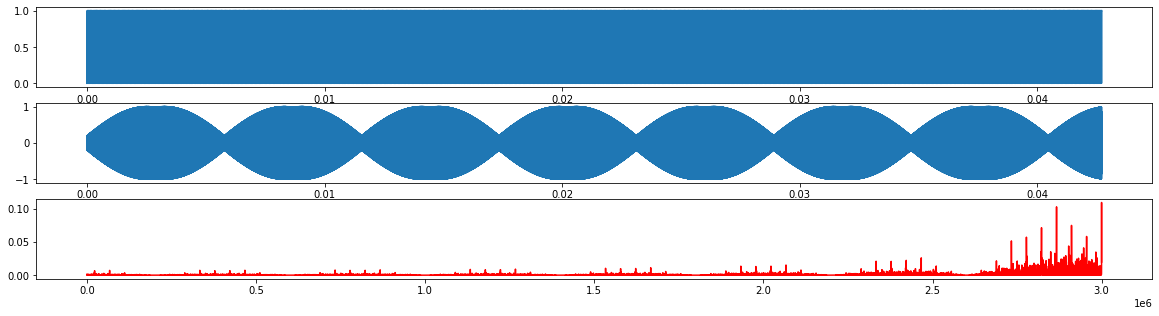

In [37]:
fc = 3000000
bfsk_mod(bit_arr,fc,173,15,2*fc,fsk_type='coherent',enable_plot = True)